# Aula 01/04/24

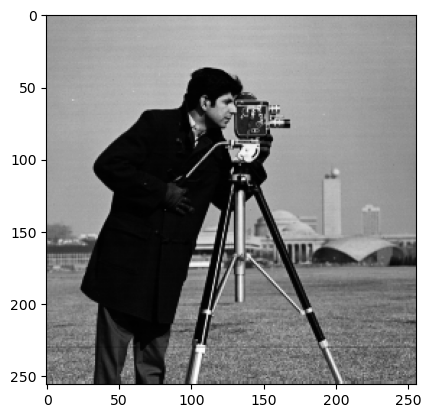

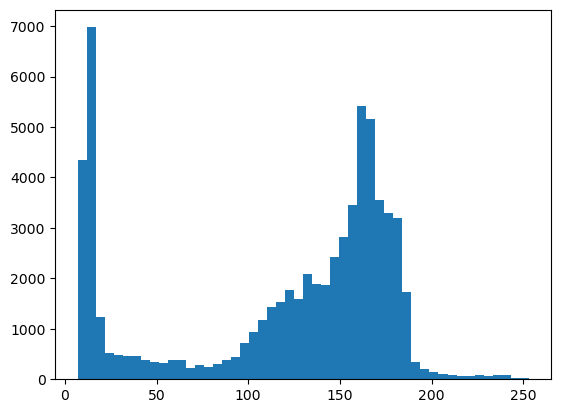

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('cameraman.tiff')
# Conversão da imagem para um array numpy
img = np.array(img)

plt.imshow(img, 'gray')
plt.figure()
# Lembrar de transformar a imagem em um array 1D
_ = plt.hist(img.flatten(), bins=50)

Transformação gamma quando a imagem é elevada a uma potência 4

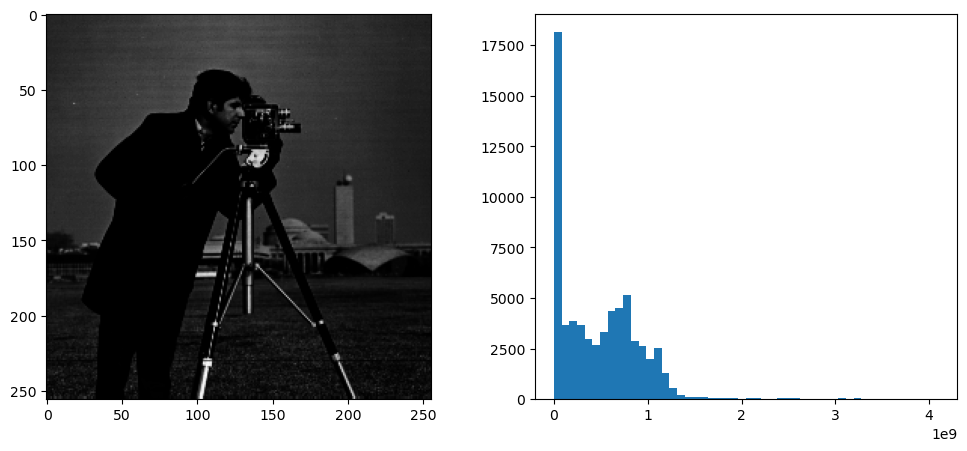

In [ ]:
exp = 4
# não pode ser int 4 por causa de overflow de valores
img_transf = img.astype(float)**exp
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(img_transf, 'gray')
plt.subplot(1, 2, 2)
_=plt.hist(img_transf.flatten(), 50)

Normalizando novamente para obter uma nova imagem com valores [0,255] após a operação anterior. 

In [ ]:
# valor minimo = 0
img_norm = img_transf - img_transf.min()
# Valor maximo = 255
img_norm = 255*img_norm/img_norm.max()
img_norm = img_norm.astype(np.uint8)

In [ ]:
print(img_norm.min(),img_norm.max())

0 255


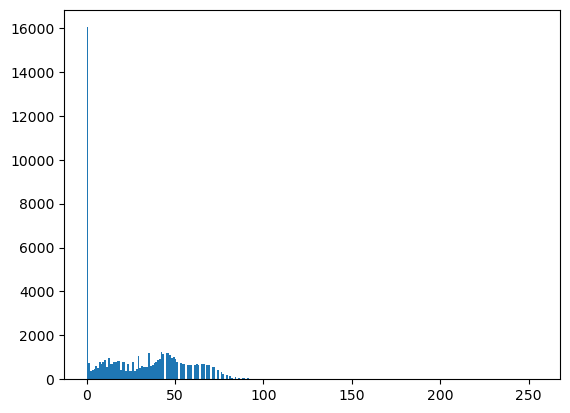

In [ ]:
_ = plt.hist(img_norm.flatten(), 256)

## Unpacking operator

In [ ]:
a = [1,2,4]
b = 4
[*a,b]

[1, 2, 4, 4]

## Iterators


In [ ]:
op = {"a":4,"b":5,"c":9}
my_it = iter(op)

print(next(my_it))
print(next(my_it))
print(next(my_it))

a
b
c


## Classes e dunder

In [ ]:
class Container:
    
    def __init__(self,vals):
        '''Construtor'''
        self.vals = vals 
    
    def __add__(self, val):
        return self.soma(val)
    
    def soma(self, num):
        res = []
        for val in self.vals:
            res.append(val+num)
        return res
    
    def __call__(self):
        print(self.vals)
        
    def __getitem__(self, idx):
        return self.vals[idx]
    
    
cont = Container([1,23,4,5,6])
cont.vals

[1, 23, 4, 5, 6]

In [ ]:
# Soma
cont.soma(3)

[4, 26, 7, 8, 9]

In [ ]:
# metodo dunder __add__
cont+3

[4, 26, 7, 8, 9]

In [ ]:
# metodo __getitem__ 
cont[1]

23

In [ ]:
cont

In [ ]:
a, *b, c = [5,7,2,0,4,8,]

In [ ]:
b

[7, 2, 0, 4]

## Método Super()

In [ ]:
class ContainerSub(Container):
    def __init__(self, vals, n):
        super().__init__(vals)
        self.n = n

In [ ]:
cont_s = ContainerSub([1,2,4,5],56)
cont_s+32

[33, 34, 36, 37]

## Anotador

In [ ]:
def transform(func):
    print("olá")
    def new_func(val):
        res = func(val)
        return 2*res
    return new_func
    
def ret(val):
    return val

In [ ]:
a = transform(ret)
a(3)

olá


6

In [ ]:
@transform
def ret2(val):
    return val


ret2(3)

olá


6

## Numpy

### Broadcasting


Funciona se os arrays são compatíveis. Se, para cada dimensão:
- Tem mesmo tamanho
- Tem tamanho 1 ou inexistente

In [ ]:
import numpy as np
from numpy.random import rand
vals1 = rand(100, 200, 3)
vals2 = rand(1)

res = vals1 + vals2
res.shape

(100, 200, 3)